In [107]:
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import numpy as np
import pandas as pd
import requests
import os


In [43]:
import urllib.request

In [77]:
## Primer paso: cargar los links desde un archivo txt a un arreglo
imgs = np.loadtxt("20_images.txt", dtype="str")

In [78]:
nomImgs=[]
for url in imgs:
    response = requests.get(url)
    filename = url.split('/')[-1]
    with open(os.path.join("", filename), 'wb') as f:
        f.write(response.content)
    nomImgs.append(filename)

In [81]:
## *Segundo paso: transformar las imagenes a vectores 
from joblib import Parallel, delayed

def imgVec(filename):
    try:
        return plt.imread(filename)
    except:
        pass

Vec = Parallel(n_jobs=4)(delayed(imgVec)(i) for i in nomImgs)

In [82]:
def color(x):
    try:
        return x.mean(axis=0).mean(axis=0)
    except:
        pass

Col = Parallel(n_jobs=4)(delayed(color)(i) for i in Vec)

In [98]:
def genCol(x):
    try:
        r = np.random.randint(0,2)
        res = x.copy()
        res[:,:,r] = 0
        return res
    except:
        pass

nVec = Parallel(n_jobs=4)(delayed(genCol)(i)for i in Vec)
nCol = Parallel(n_jobs=4)(delayed(color)(i) for i in nVec)

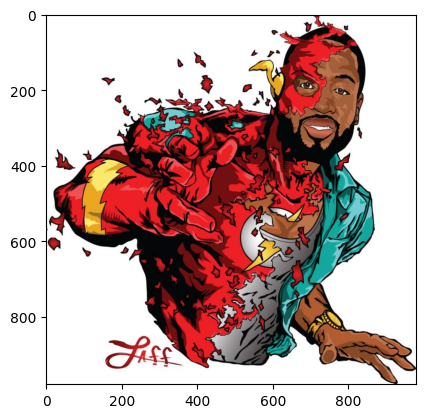

In [99]:
plt.imshow(Vec[1])

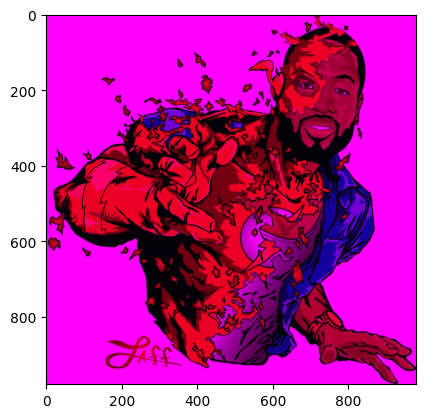

In [100]:
plt.imshow(nVec[1])

In [114]:
datos = {'url': imgs,'oldcolor': Col,'newcolor': nCol}
df=pd.DataFrame(datos)
df

,url,oldcolor,newcolor
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,"[85.40552734374992, 64.06316840277778, 57.1665...","[85.40552734374992, 0.0, 57.16652452256953]"
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,"[184.8877165370747, 153.66339872005992, 150.00...","[184.8877165370747, 0.0, 150.00709595380545]"
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"[0.9260053, 0.48560145, 0.22606303]","[0.0, 0.48560145, 0.22606303]"
3,https://static.wikia.nocookie.net/fairytail/im...,"[140.52542115364108, 169.9349290969186, 228.43...","[140.52542115364108, 0.0, 228.4329566051818]"
4,https://static.wikia.nocookie.net/doblaje/imag...,"[0.6056329, 0.47516784, 0.3151482]","[0.0, 0.47516784, 0.3151482]"
5,https://depor.com/resizer/EkdERO36Wj8BqMsc67Kd...,"[83.62870972222213, 129.25732847222207, 107.02...","[83.62870972222213, 0.0, 107.02922430555549]"
6,https://www.rd.com/wp-content/uploads/2019/01/...,None,None
7,https://images.unsplash.com/photo-161126725432...,"[162.4707981407701, 157.5878207171314, 152.563...","[0.0, 157.5878207171314, 152.56381142098286]"
8,https://wallpaper.dog/large/20523050.png,"[0.65925187, 0.3563062, 0.2546971, 1.0]","[0.65925187, 0.0, 0.2546971, 1.0]"
9,https://m.media-amazon.com/images/I/41b9u-1yUV...,"[200.39415395787952, 196.50250285299288, 198.8...","[0.0, 196.50250285299288, 198.8376322751323]"


In [117]:
df['dif']=df['oldcolor']-df['newcolor']
df

,url,oldcolor,newcolor,dif
0,https://i.ytimg.com/vi/bDPkImgNs8Y/maxresdefau...,"[85.40552734374992, 64.06316840277778, 57.1665...","[85.40552734374992, 0.0, 57.16652452256953]","[0.0, 64.06316840277778, 0.0]"
1,https://e00-marca.uecdn.es/albumes/2014/11/18/...,"[184.8877165370747, 153.66339872005992, 150.00...","[184.8877165370747, 0.0, 150.00709595380545]","[0.0, 153.66339872005992, 0.0]"
2,https://hips.hearstapps.com/hmg-prod.s3.amazon...,"[0.9260053, 0.48560145, 0.22606303]","[0.0, 0.48560145, 0.22606303]","[0.9260053, 0.0, 0.0]"
3,https://static.wikia.nocookie.net/fairytail/im...,"[140.52542115364108, 169.9349290969186, 228.43...","[140.52542115364108, 0.0, 228.4329566051818]","[0.0, 169.9349290969186, 0.0]"
4,https://static.wikia.nocookie.net/doblaje/imag...,"[0.6056329, 0.47516784, 0.3151482]","[0.0, 0.47516784, 0.3151482]","[0.6056329, 0.0, 0.0]"
5,https://depor.com/resizer/EkdERO36Wj8BqMsc67Kd...,"[83.62870972222213, 129.25732847222207, 107.02...","[83.62870972222213, 0.0, 107.02922430555549]","[0.0, 129.25732847222207, 0.0]"
6,https://www.rd.com/wp-content/uploads/2019/01/...,None,None,NaN
7,https://images.unsplash.com/photo-161126725432...,"[162.4707981407701, 157.5878207171314, 152.563...","[0.0, 157.5878207171314, 152.56381142098286]","[162.4707981407701, 0.0, 0.0]"
8,https://wallpaper.dog/large/20523050.png,"[0.65925187, 0.3563062, 0.2546971, 1.0]","[0.65925187, 0.0, 0.2546971, 1.0]","[0.0, 0.3563062, 0.0, 0.0]"
9,https://m.media-amazon.com/images/I/41b9u-1yUV...,"[200.39415395787952, 196.50250285299288, 198.8...","[0.0, 196.50250285299288, 198.8376322751323]","[200.39415395787952, 0.0, 0.0]"


In [ ]:
### Los pasos que tengan * se deben hacer de manera paralelizada


## *Tercer paso: obtener el primer color de la imagen que se obtiene de: colors = np.unique(imagen.reshape(-1, imagen.shape[2]), axis=0)
## *Cuarto paso: cambiar el color de la imagen a un color random
## Quinto paso: hacer un dataframe que tenga el link de la imagen con una columna llamada url, su antiguo color con columna llamada 
## oldcolor y su nuevo color con columna llamada newcolor
## *Sexto paso: hacer una columna nueva que tenga diffcolor como la diferencia numerica entre newcolor y oldcolor